In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator
from scipy import linalg
from scipy.optimize import minimize



In [45]:
# Function to approximate
def f(x):
    return (1 + x) / np.log(1 + x)

# Chebyshev nodes generation 
def chebyshev_nodes(n, a=1, b=5):
    k = np.arange(n + 1)
    return 0.5 * ((b - a) * np.cos((2 * k + 1) * np.pi / (2 * n + 2)) + (b + a))

#mean square error calculation
def mean_square_error(f, approximation, x_vals):
    f_vals = f(x_vals)
    approx_vals = approximation(x_vals)
    return np.mean((f_vals - approx_vals) ** 2)


### Legrange


In [46]:
# Lagrange interpolation 

def lagrange_interpolation(x, y):
    interpolator = BarycentricInterpolator(x, y)
    return interpolator
def mean_square_error(f, approximation, x_vals):
    f_vals = f(x_vals)
    approx_vals = approximation(x_vals)
    return np.mean((f_vals - approx_vals) ** 2)



In [47]:
# Plot the approximations and MSE 
def plot_approximations_separately(x_vals, f_vals, approximations, errors, orders):
    plt.figure(figsize=(14, 10))
    
    for i, (approx, order) in enumerate(zip(approximations, orders)):
        plt.subplot(3, 2, i + 1)
        plt.plot(x_vals, f_vals, label='Original Function', color='black')
        plt.plot(x_vals, approx(x_vals), label=f'Approx Order {order}')
        plt.legend()
        plt.title(f'Approximation Order {order}')
        plt.xlabel('x')
        plt.ylabel('f(x)')

    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.plot(orders, errors, marker='o', linestyle='--')
    plt.title('Mean Square Error vs Approximation Order')
    plt.xlabel('Approximation Order')
    plt.ylabel('Mean Square Error')
    plt.show()


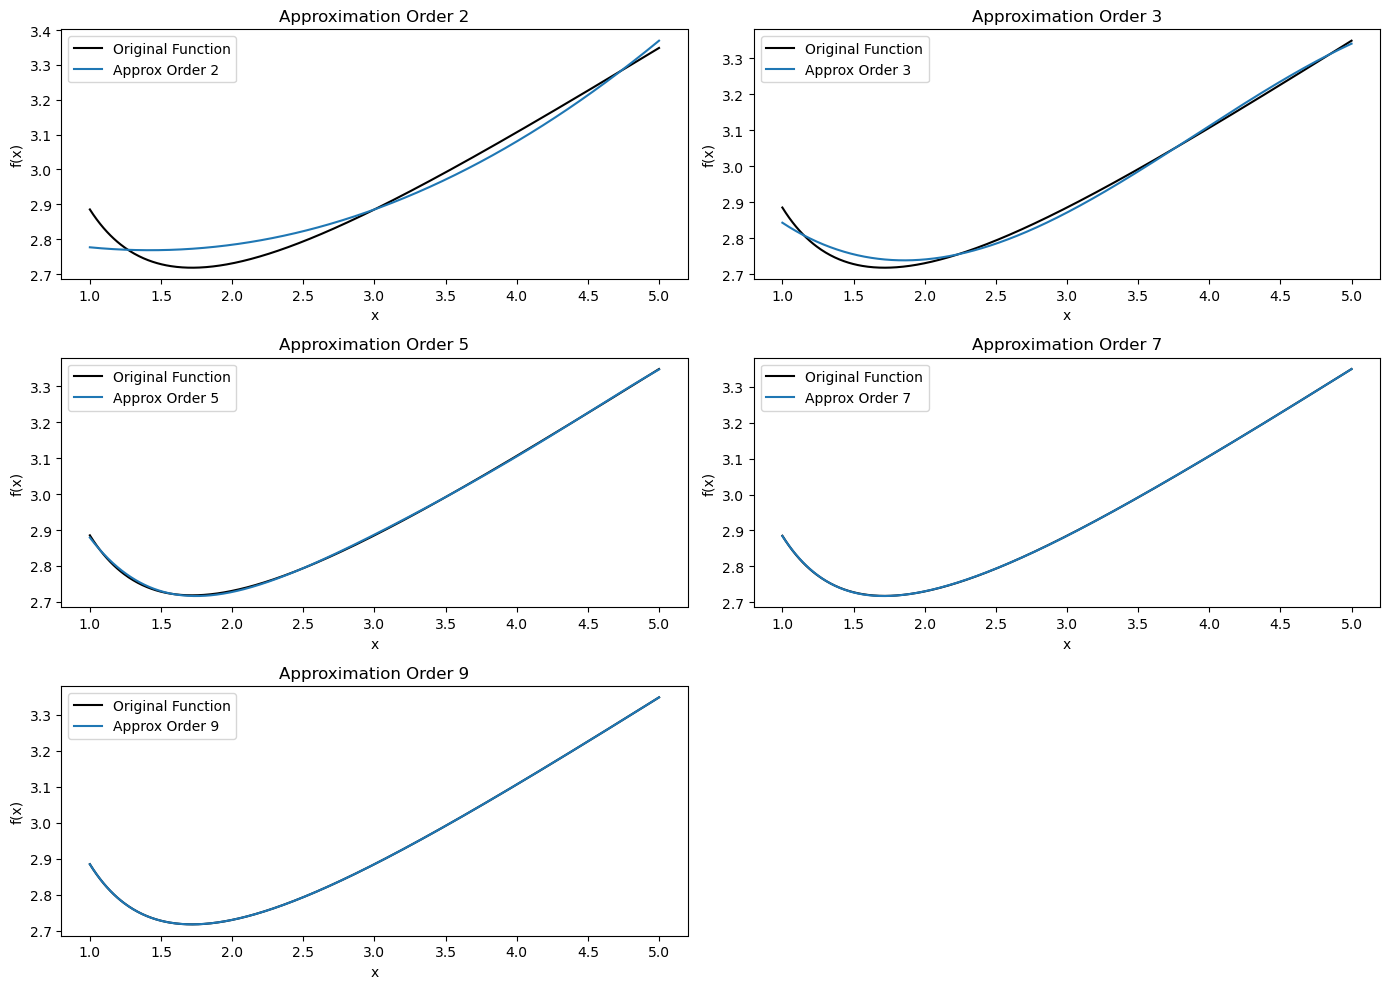

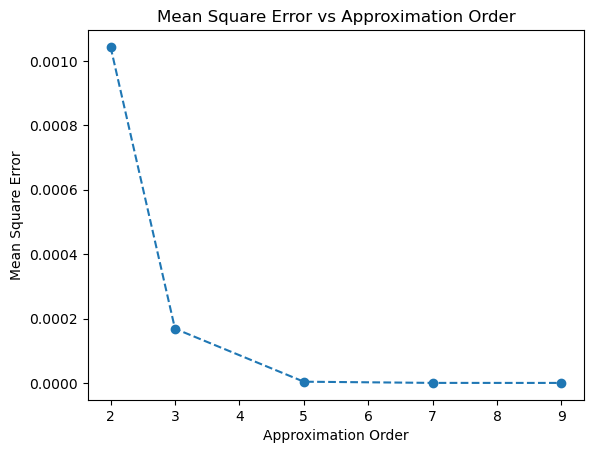

In [48]:
x_vals = np.linspace(1, 5, 500)
f_vals = f(x_vals)

orders = [2, 3, 5, 7, 9]
approximations = []
errors = []

# Chebyshev nodes and interpolation for different orders
for order in orders:
    cheby_x = chebyshev_nodes(order)
    cheby_y = f(cheby_x)
    
    # Lagrange approximation
    lagrange_interp = lagrange_interpolation(cheby_x, cheby_y)
    approximations.append(lagrange_interp)
    errors.append(mean_square_error(f, lagrange_interp, x_vals))

plot_approximations_separately(x_vals, f_vals, approximations, errors, orders)

### Newton


In [49]:
# Newton interpolation (based on divided differences)
def newton_interpolation(x, y):
    n = len(x)
    coef = np.copy(y)
    for i in range(1, n):
        coef[i:] = (coef[i:] - coef[i - 1]) / (x[i:] - x[i - 1])
    return coef

def newton_polynomial(coef, x_data, x):
    result = coef[-1]
    for i in range(len(coef) - 2, -1, -1):
        result = result * (x - x_data[i]) + coef[i]
    return result



In [50]:
# Plot the approximations and MSE 
def plot_newton_approximations_separately(x_vals, f_vals, approximations, errors, orders):
    plt.figure(figsize=(14, 10))
    
    for i, (approx, order) in enumerate(zip(approximations, orders)):
        plt.subplot(3, 2, i + 1)
        plt.plot(x_vals, f_vals, label='Original Function', color='black')
        plt.plot(x_vals, approx, label=f'Approx Order {order}')
        plt.legend()
        plt.title(f'Newton Approximation Order {order}')
        plt.xlabel('x')
        plt.ylabel('f(x)')

    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.plot(orders, errors, marker='o', linestyle='--')
    plt.title('Mean Square Error vs Newton Approximation Order')
    plt.xlabel('Approximation Order')
    plt.ylabel('Mean Square Error')
    plt.show()

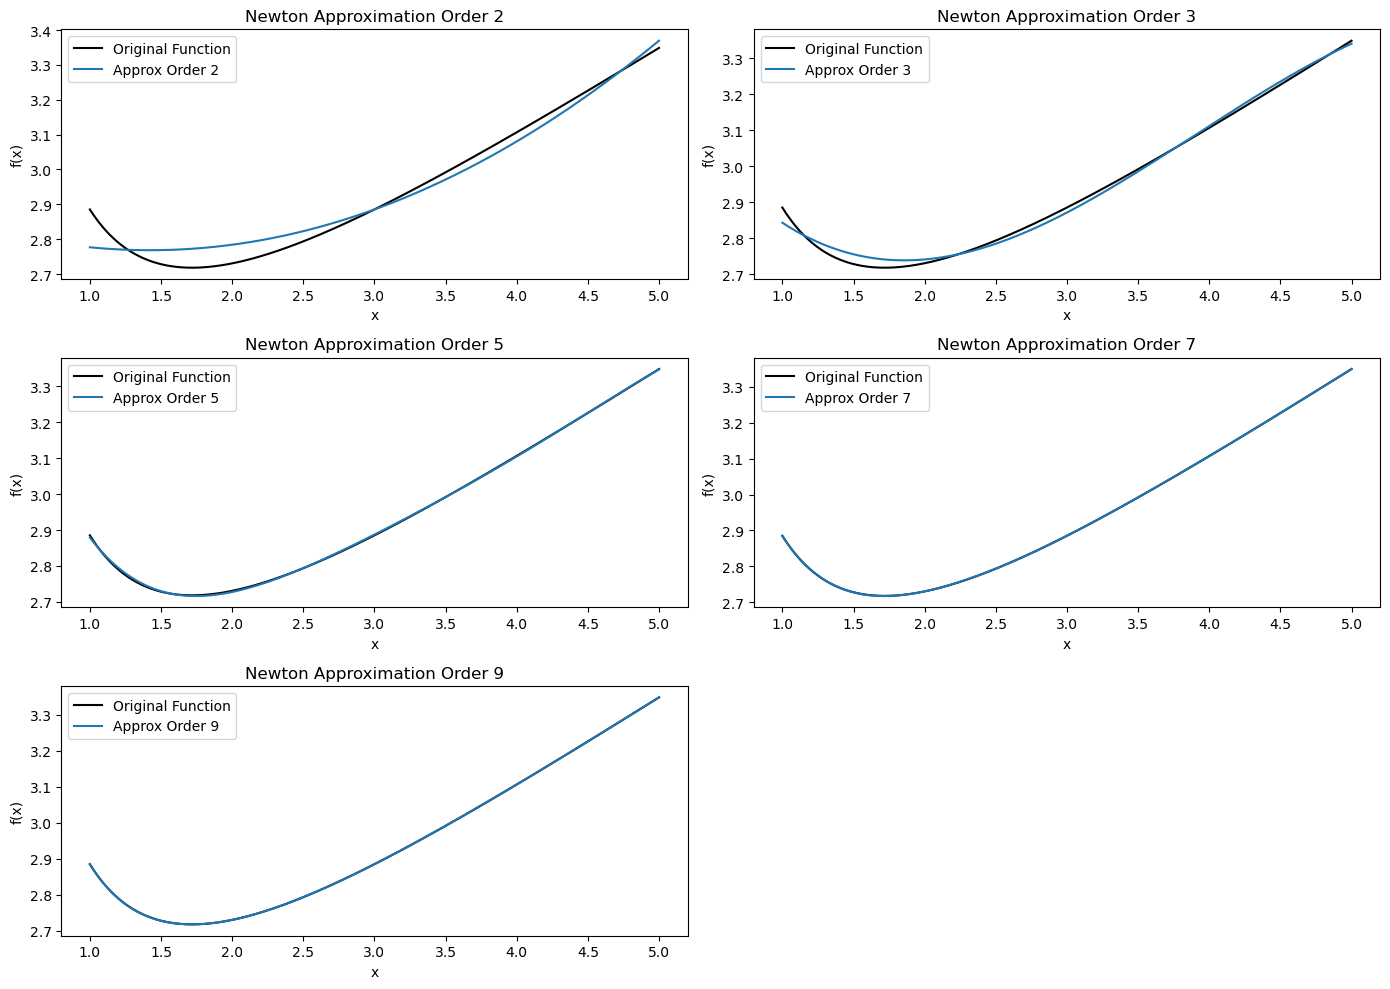

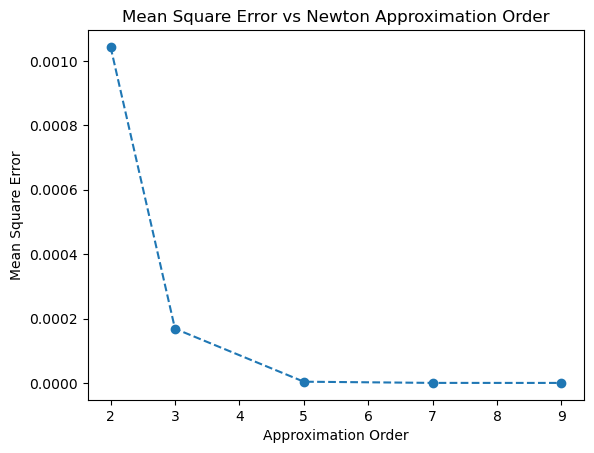

In [51]:
x_vals = np.linspace(1, 5, 500)
f_vals = f(x_vals)

orders = [2, 3, 5, 7, 9]
approximations = []
errors = []

# Chebyshev nodes and Newton interpolation for different orders
for order in orders:
    cheby_x = chebyshev_nodes(order)
    cheby_y = f(cheby_x)
    
    # Newton approximation
    newton_coef = newton_interpolation(cheby_x, cheby_y)
    newton_interp = newton_polynomial(newton_coef, cheby_x, x_vals)
    approximations.append(newton_interp)
    errors.append(mean_square_error(f, lambda x: newton_polynomial(newton_coef, cheby_x, x), x_vals))

plot_newton_approximations_separately(x_vals, f_vals, approximations, errors, orders)

###     Chebyshev polynomial 

In [52]:
# Function to compute Chebyshev polynomial approximation
def chebyshev_polynomial_approximation(x, degree, a=1, b=5):
    T = np.polynomial.chebyshev.Chebyshev.interpolate(f, degree, domain=[a, b])
    return T(x)


In [53]:
# Plot the approximations and MSE
def plot_chebyshev_approximations_separately(x_vals, f_vals, approximations, errors, orders):
    plt.figure(figsize=(14, 10))
    
    for i, (approx, order) in enumerate(zip(approximations, orders)):
        plt.subplot(3, 2, i + 1)
        plt.plot(x_vals, f_vals, label='Original Function', color='black')
        plt.plot(x_vals, approx, label=f'Approx Order {order}')
        plt.legend()
        plt.title(f'Chebyshev Approximation Order {order}')
        plt.xlabel('x')
        plt.ylabel('f(x)')

    plt.tight_layout()
    plt.show()
    plt.figure()
    plt.plot(orders, errors, marker='o', linestyle='--')
    plt.title('Mean Square Error vs Chebyshev Approximation Order')
    plt.xlabel('Approximation Order')
    plt.ylabel('Mean Square Error')
    plt.show()


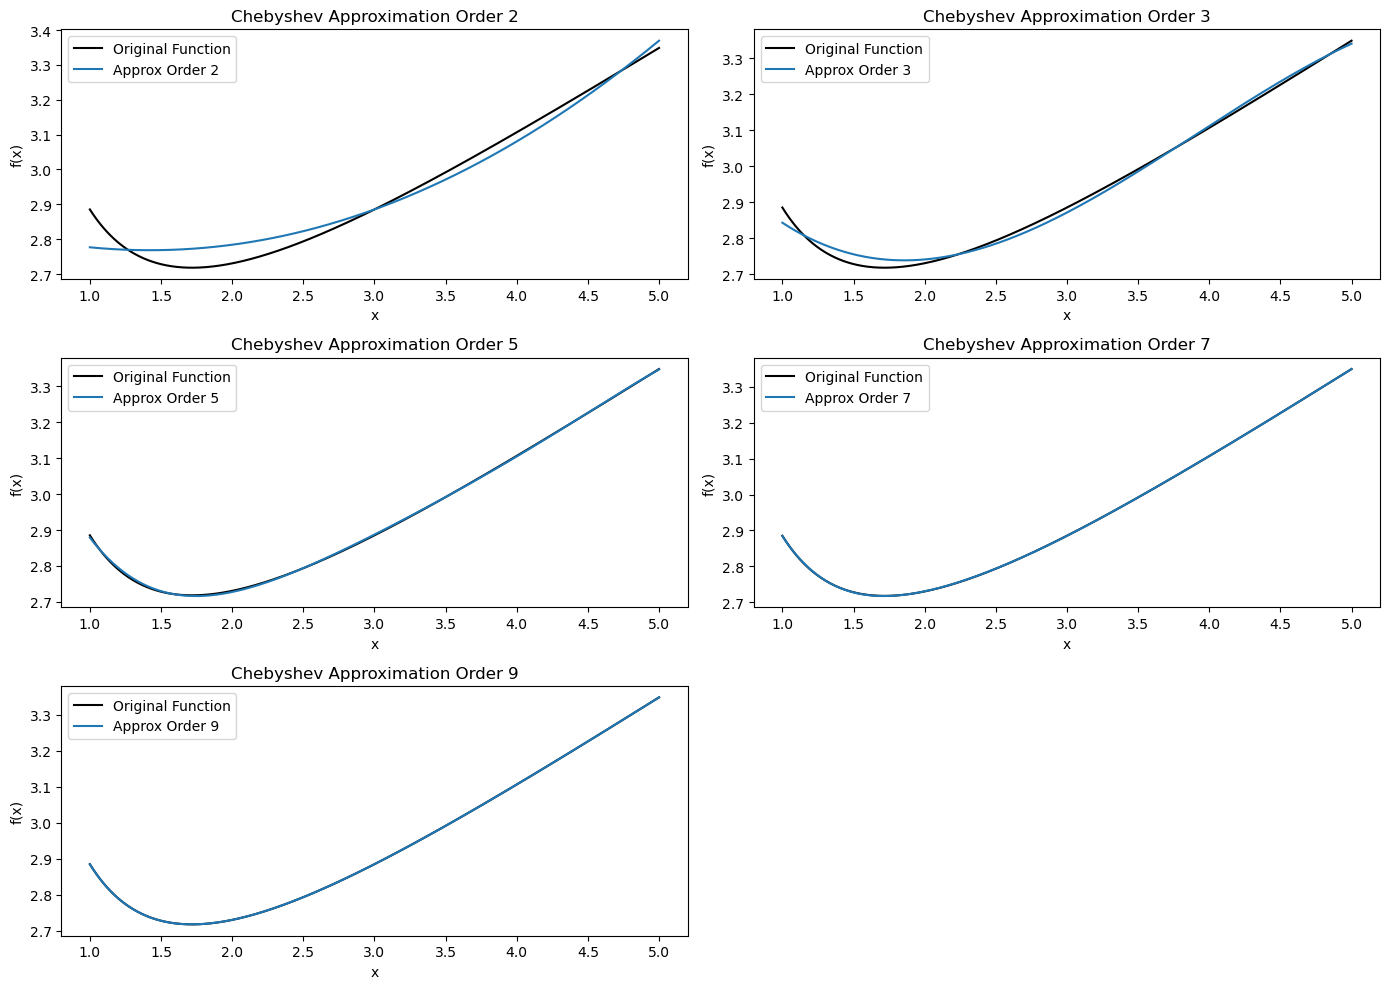

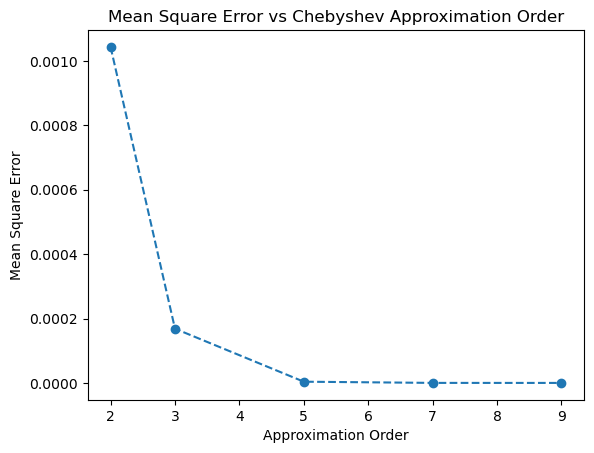

In [54]:
x_vals = np.linspace(1, 5, 500)
f_vals = f(x_vals)

orders = [2, 3, 5, 7, 9]
approximations = []
errors = []

# Chebyshev polynomial approximation for different orders
for order in orders:
    cheby_approx = chebyshev_polynomial_approximation(x_vals, order)
    approximations.append(cheby_approx)
    errors.append(mean_square_error(f, lambda x: chebyshev_polynomial_approximation(x, order), x_vals))

# Plotting each Chebyshev approximation separately
plot_chebyshev_approximations_separately(x_vals, f_vals, approximations, errors, orders)

### Pade rational Function


In [55]:
# Pade approximation (using Taylor series expansion)
def pade_approximation(f, x0, M, N, x_vals):
    # Compute Taylor series coefficients
    a = [f(x0)]
    h = 0.01
    for i in range(1, M + N + 1):
        deriv_approx = (f(x0 + h) - f(x0 - h)) / (2 * h)
        a.append(deriv_approx / np.math.factorial(i))

    # Create A matrix and solve for denominator
    A = np.zeros((N, N))
    for m in range(N):
        for n in range(N):
            A[m, n] = a[M + 1 + m - n]
    b = -np.array(a[M + 1:M + 1 + N])
    d = np.linalg.solve(A, b)

    # Compute numerator and denominator
    num = np.poly1d([1])
    den = np.poly1d([1, *d])
    return np.polyval(num, x_vals) / np.polyval(den, x_vals)



In [56]:
# Plot the approximations and mSE
def plot_pade_approximations_separately(x_vals, f_vals, approximations, errors, orders):
    plt.figure(figsize=(14, 10))
    
    for i, (approx, order) in enumerate(zip(approximations, orders)):
        plt.subplot(3, 2, i + 1)
        plt.plot(x_vals, f_vals, label='Original Function', color='black')
        plt.plot(x_vals, approx, label=f'Approx Order {order}')
        plt.legend()
        plt.title(f'Pade Approximation Order {order}')
        plt.xlabel('x')
        plt.ylabel('f(x)')

    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.plot(orders, errors, marker='o', linestyle='--')
    plt.title('Mean Square Error vs Pade Approximation Order')
    plt.xlabel('Approximation Order')
    plt.ylabel('Mean Square Error')
    plt.show()


/var/folders/bn/hvps12x95rs8344kbsx554lh0000gn/T/ipykernel_56336/4153578928.py:21: RuntimeWarning: divide by zero encountered in divide
  return np.polyval(num, x_vals) / np.polyval(den, x_vals)


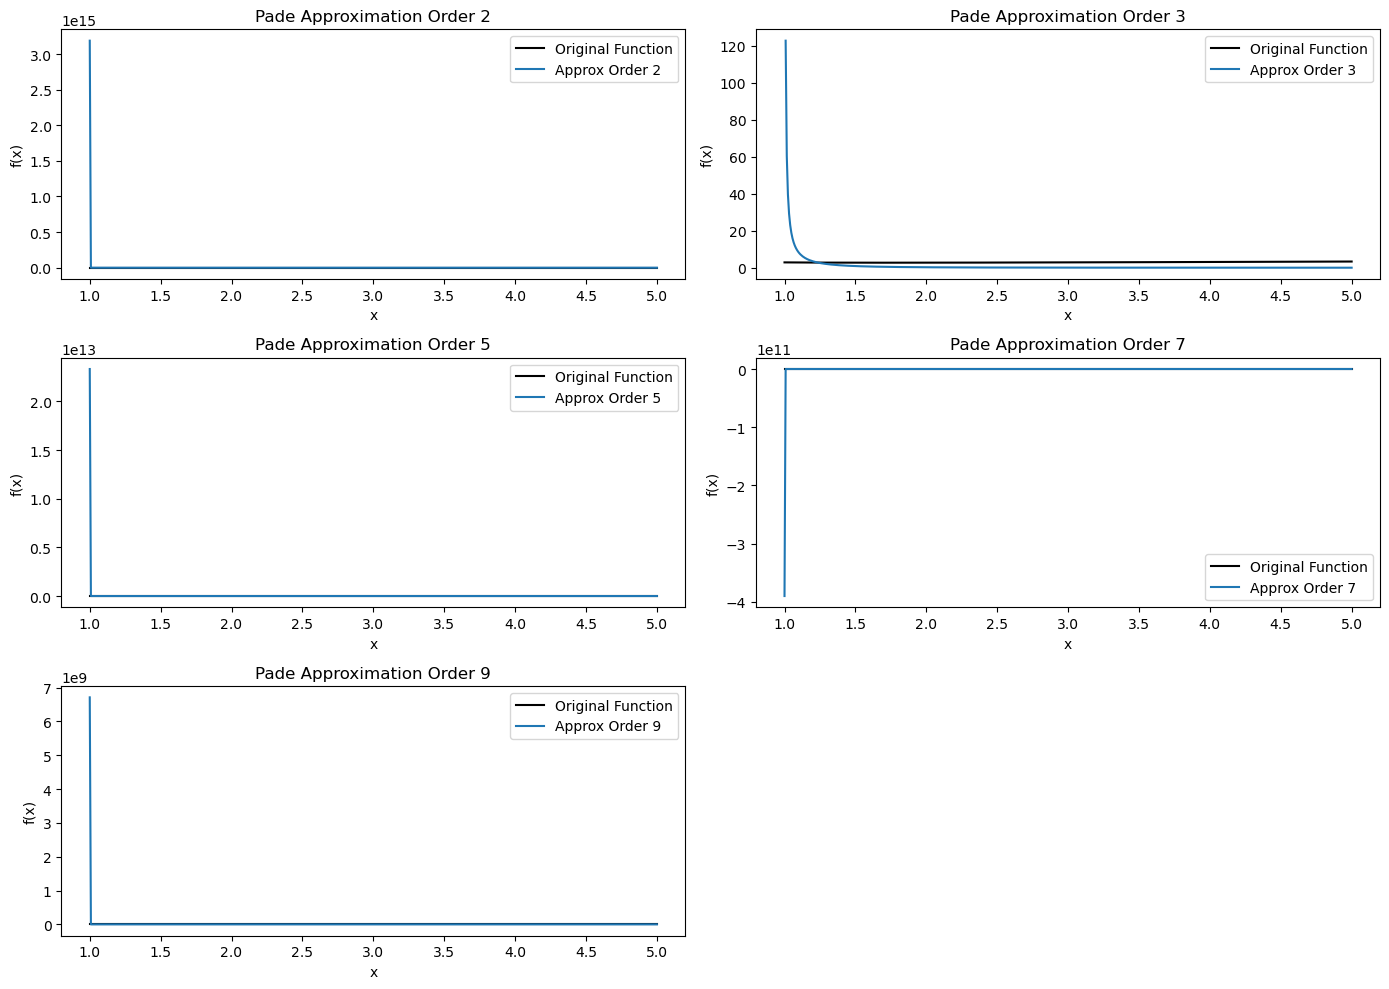

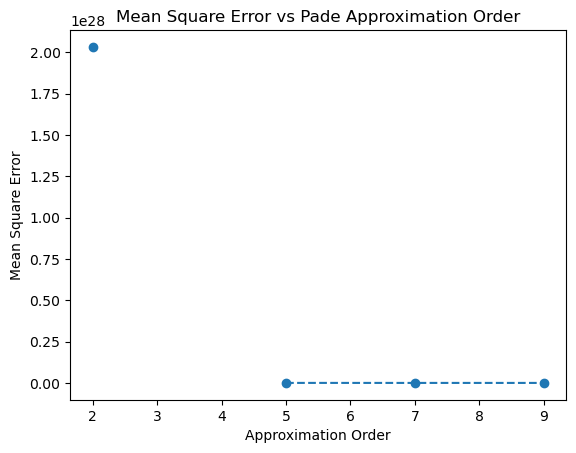

In [57]:
x_vals = np.linspace(1, 5, 500)
f_vals = f(x_vals)

orders = [2, 3, 5, 7, 9]
approximations = []
errors = []

# Pade approximation for different orders
for order in orders:
    pade_approx = pade_approximation(f, 1, order, order, x_vals)
    approximations.append(pade_approx)
    errors.append(mean_square_error(f, lambda x: pade_approximation(f, 1, order, order, x), x_vals))

# Plotting each Pade approximation separately
plot_pade_approximations_separately(x_vals, f_vals, approximations, errors, orders)